<a href="https://colab.research.google.com/github/muwudev/Diabetes-Classifier/blob/main/diabetes_drug_classification_using_RF_SVM_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. drug classification with SVM and Random Forests

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import GridSearchCV # for optimisation, best combination of hyperparameters
from sklearn.model_selection import cross_val_score # for model performance

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/diabetes.csv')

In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
df.isna().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
# summary stats before - table 1.1
df.describe(include='all').round(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00
mean,3.85,120.89,69.11,20.54,79.80,31.99,0.47,33.24,0.35
std,3.37,31.97,19.36,15.95,115.24,7.88,0.33,11.76,0.48
min,0.00,0.00,0.00,0.00,0.00,0.00,0.08,21.00,0.00
25%,1.00,99.00,62.00,0.00,0.00,27.30,0.24,24.00,0.00
50%,3.00,117.00,72.00,23.00,30.50,32.00,0.37,29.00,0.00
75%,6.00,140.25,80.00,32.00,127.25,36.60,0.63,41.00,1.00
max,17.00,199.00,122.00,99.00,846.00,67.10,2.42,81.00,1.00


In [ ]:
df[df.eq(0)==True].count()

,0
Pregnancies,111
Glucose,5
BloodPressure,35
SkinThickness,227
Insulin,374
BMI,11
DiabetesPedigreeFunction,0
Age,0
Outcome,500


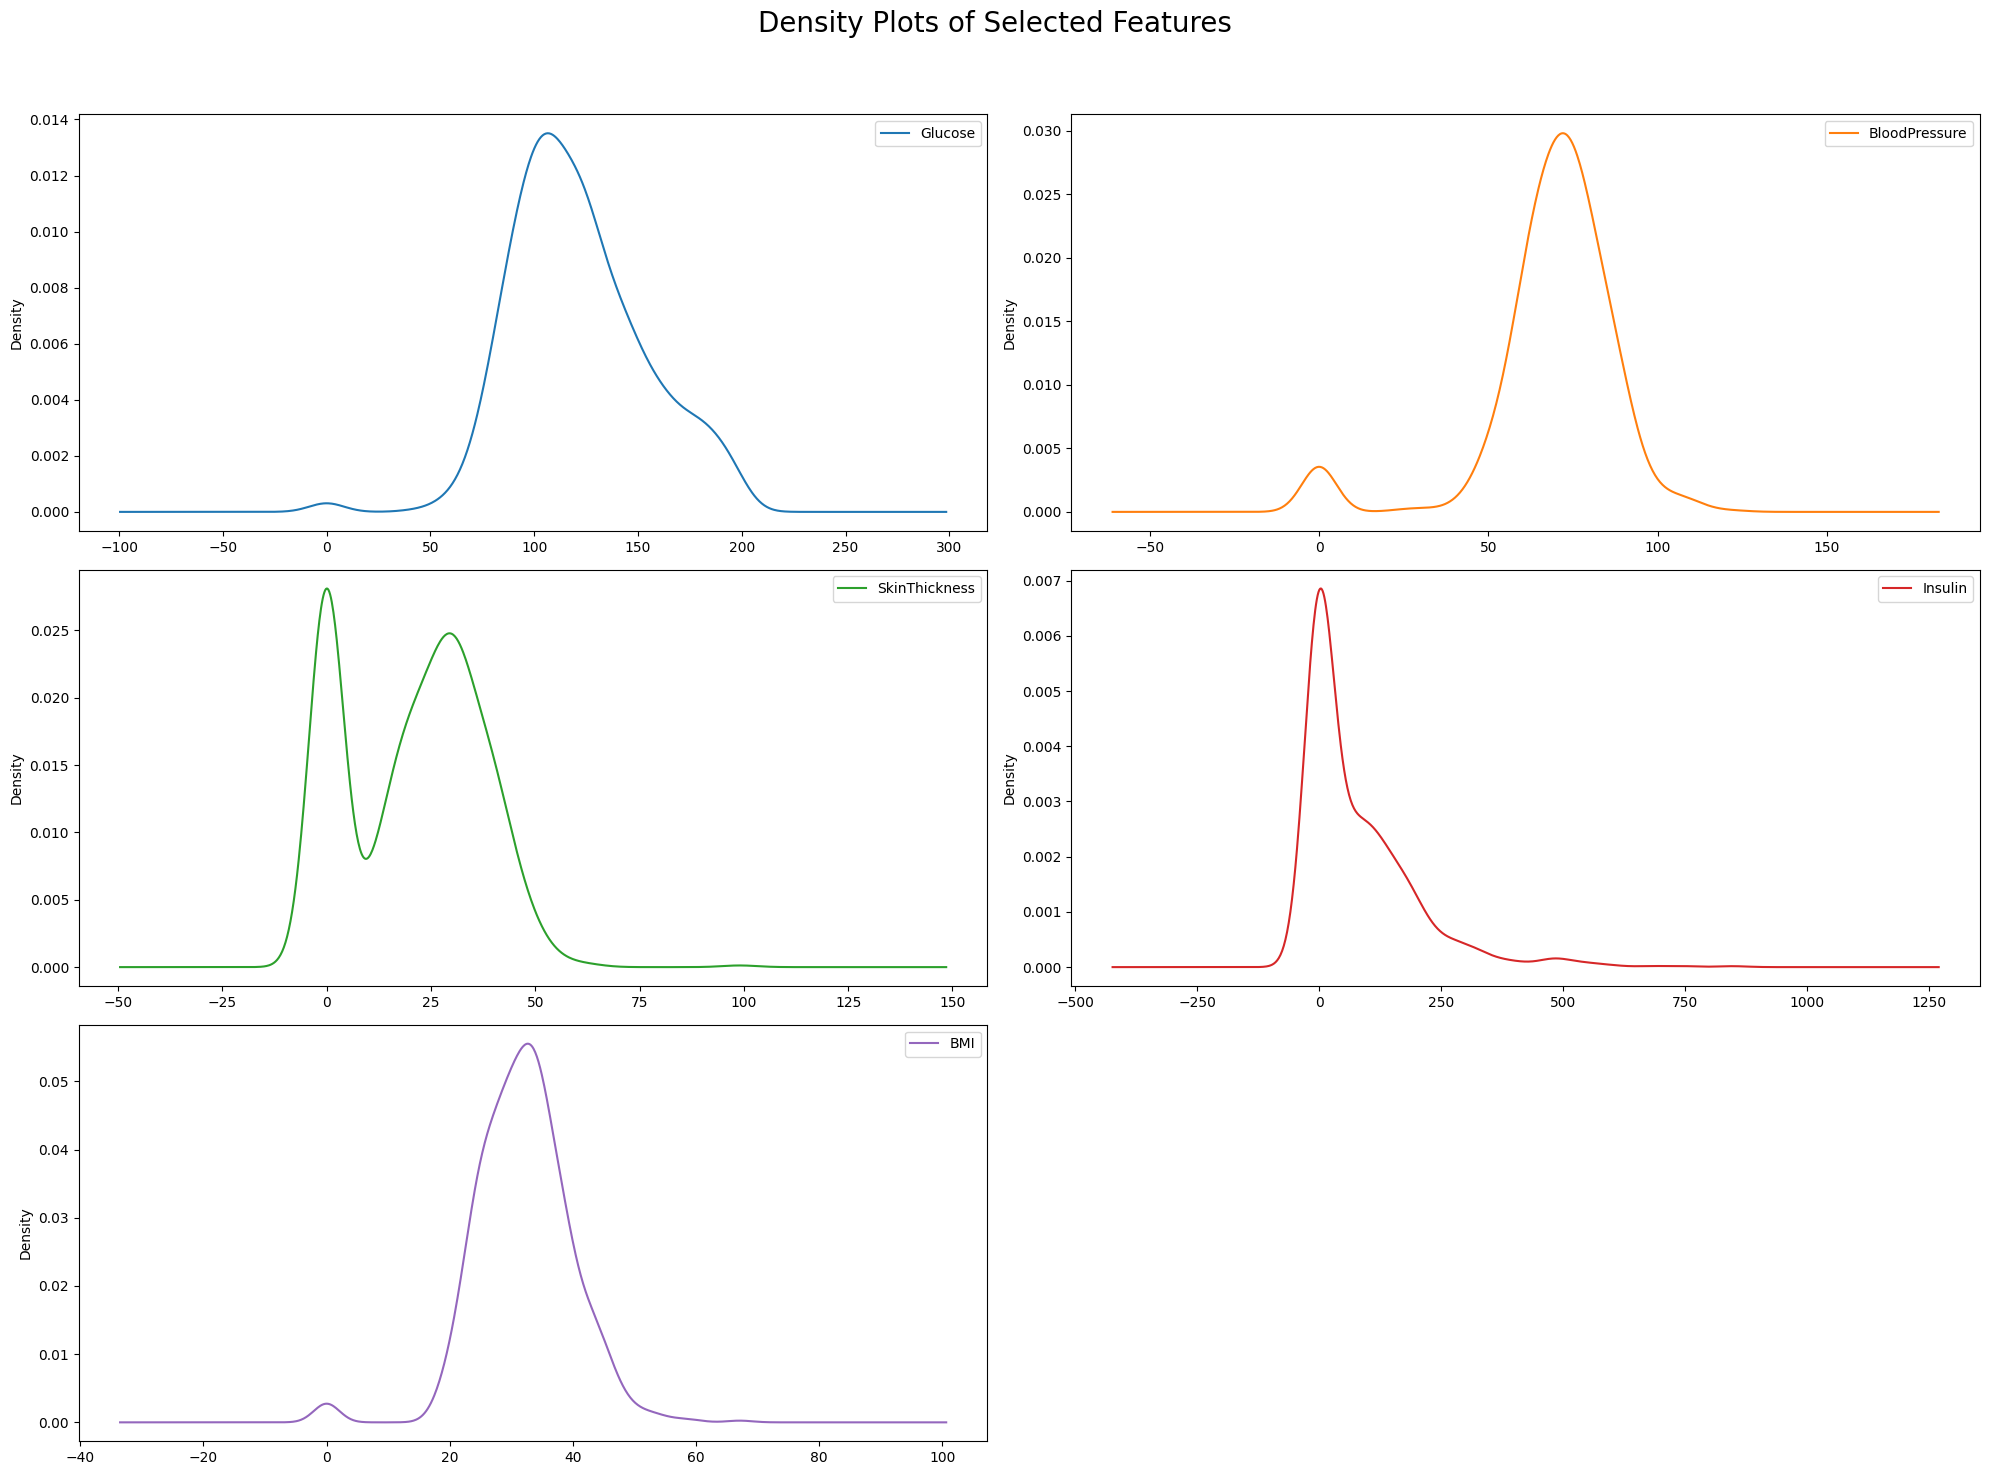

In [ ]:
# checking skewnesss to see if needs median or mean for replacement

columns_to_plot = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

df[columns_to_plot].plot(kind='density', subplots=True, layout=(3, 2), figsize=(20, 15), sharex=False)
plt.suptitle('Density Plots of Selected Features', fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

2. Replacing missing values with avg (median, mean)



In [ ]:
# replace missing values with median - columns - Insulin
median = df['Insulin'].median()
df['Insulin'] = df['Insulin'].replace(0, median)
df.head() #

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,30.5,33.6,0.627,50,1
1,1,85,66,29,30.5,26.6,0.351,31,0
2,8,183,64,0,30.5,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
4,0,137,40,35,168.0,43.1,2.288,33,1


In [ ]:
# replace missing values with mean - columns -  Glucose, BloodPressure, SkinThickness, BMI
columns_to_process = ['Glucose', 'BloodPressure', 'SkinThickness', 'BMI',]

# Iterate over each column, calculate the mean, and replace 0s with the mean
for column in columns_to_process:
    median = df[column].median()
    df[column] = df[column].replace(0, median)

In [ ]:
df[df.eq(0)==True].count()

,0
Pregnancies,111
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,500


In [ ]:
# tables after - statistics
# table 1.2
df.describe(include='all').round(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00
mean,3.85,121.66,72.39,27.33,94.65,32.45,0.47,33.24,0.35
std,3.37,30.44,12.10,9.23,105.55,6.88,0.33,11.76,0.48
min,0.00,44.00,24.00,7.00,14.00,18.20,0.08,21.00,0.00
25%,1.00,99.75,64.00,23.00,30.50,27.50,0.24,24.00,0.00
50%,3.00,117.00,72.00,23.00,31.25,32.00,0.37,29.00,0.00
75%,6.00,140.25,80.00,32.00,127.25,36.60,0.63,41.00,1.00
max,17.00,199.00,122.00,99.00,846.00,67.10,2.42,81.00,1.00


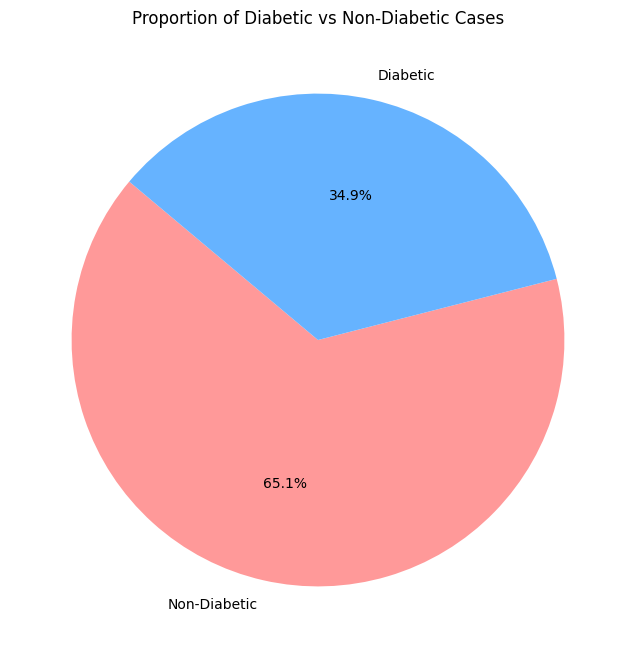

In [ ]:
# Calculate the counts for each outcome
outcome_counts = df['Outcome'].value_counts()

# Plot
plt.figure(figsize=(8, 8))
plt.pie(outcome_counts, labels=['Non-Diabetic', 'Diabetic'], autopct='%1.1f%%', colors=['#ff9999','#66b3ff'], startangle=140)
plt.title('Proportion of Diabetic vs Non-Diabetic Cases')
plt.show()

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,30.5,33.6,0.627,50,1
1,1,85,66,29,30.5,26.6,0.351,31,0
2,8,183,64,23,30.5,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
4,0,137,40,35,168.0,43.1,2.288,33,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(3), int64(6)
memory usage: 54.1 KB


3. Further analysis

Diaabetic/ non diabetcic

<ipython-input-17-f35f1f284306>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Age)


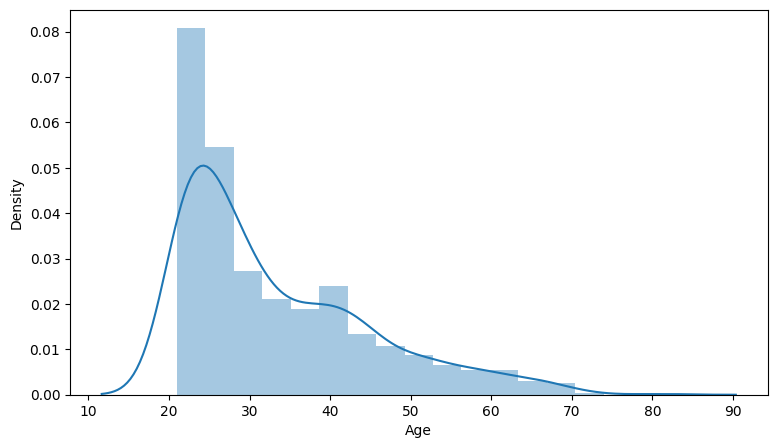

In [ ]:
# age distribution - add diabetic/ non diabetic distribution as well
plt.figure(figsize = (9,5))
sns.distplot(df.Age)
plt.show()

In [ ]:
df.Outcome.value_counts()

,count
Outcome,
0,500
1,268


In [ ]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

4. Pregnancies

In [ ]:
x = df[df.eq(0)==True].count()
x['Pregnancies']

# pregnant/ non and diabatic / non
df['Pregnancy_Status'] = df['Pregnancies'].apply(lambda x: 'Pregnant' if x > 0 else 'Not Pregnant')
df['Diabetes_Status'] = df['Outcome'].apply(lambda x: 'Diabetic' if x == 1 else 'Non-Diabetic')

# Count number of people in each category
count_data = df.groupby(['Pregnancy_Status', 'Diabetes_Status']).size().reset_index(name='Count')

count_data

,Pregnancy_Status,Diabetes_Status,Count
0,Not Pregnant,Diabetic,38
1,Not Pregnant,Non-Diabetic,73
2,Pregnant,Diabetic,230
3,Pregnant,Non-Diabetic,427


Findinf Corellation

In [ ]:
# method : {‘pearson’, ‘kendall’, ‘spearman’} or callable
corr = df.corr(method='pearson')
corr.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.128213,0.208615,0.032568,-0.055697,0.021546,-0.033523,0.544341,0.221898
Glucose,0.128213,1.000000,0.218937,0.172143,0.357573,0.231400,0.137327,0.266909,0.492782
BloodPressure,0.208615,0.218937,1.000000,0.147809,-0.028721,0.281132,-0.002378,0.324915,0.165723
SkinThickness,0.032568,0.172143,0.147809,1.000000,0.238188,0.546951,0.142977,0.054514,0.189065
Insulin,-0.055697,0.357573,-0.028721,0.238188,1.000000,0.189022,0.178029,-0.015413,0.148457


<Axes: >

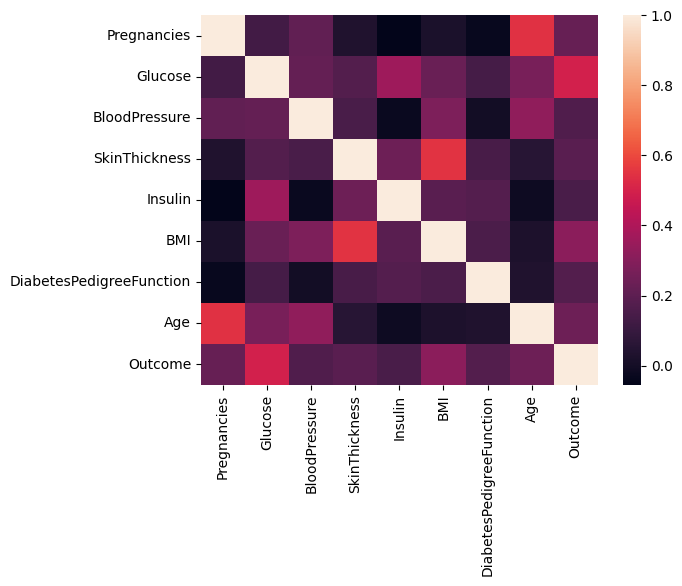

In [ ]:
sns.heatmap(corr)

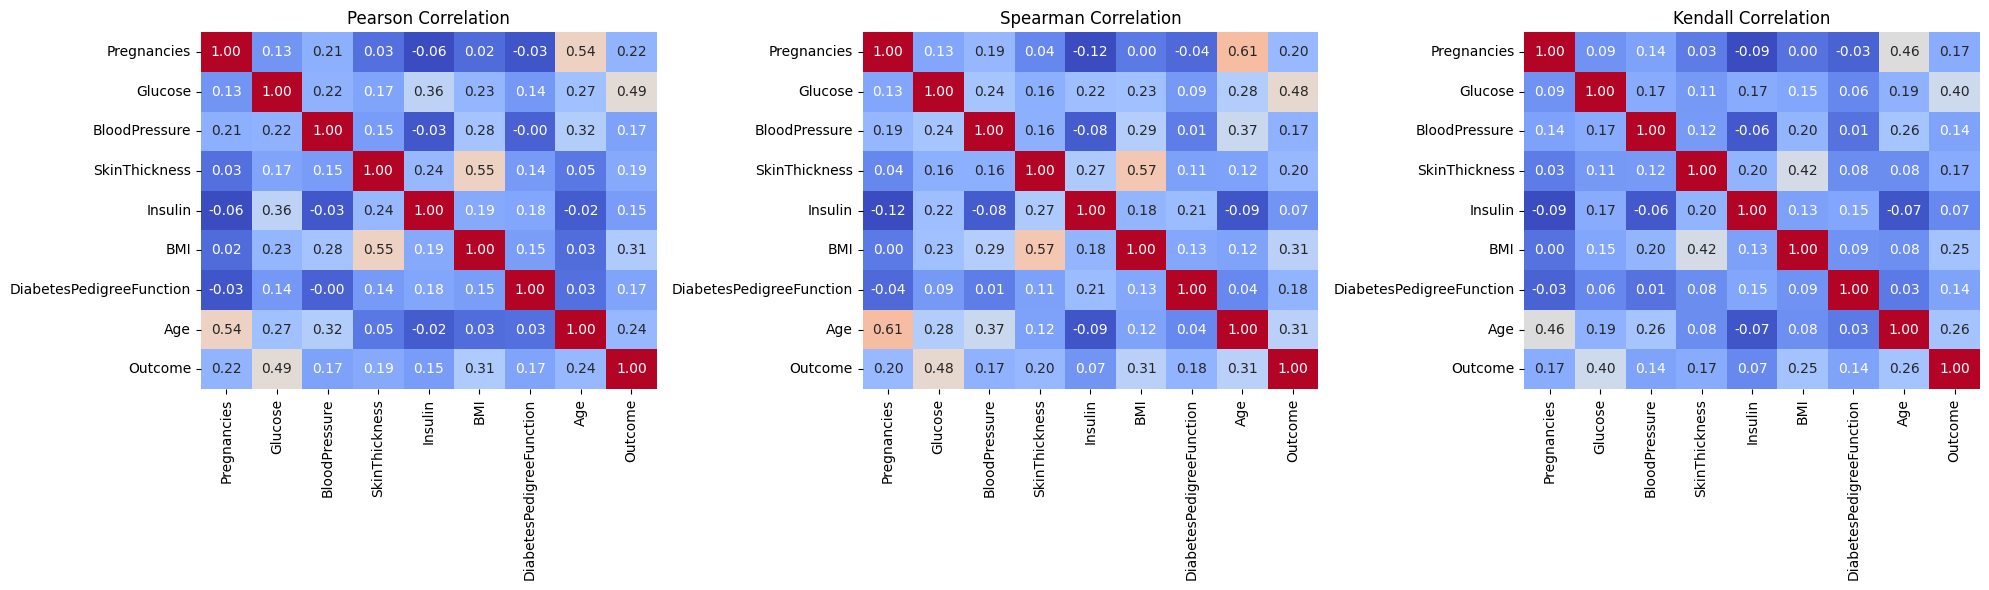

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assume 'df' is your DataFrame

# Compute correlation matrices
pearson_corr = df.corr(method='pearson')
spearman_corr = df.corr(method='spearman')
kendall_corr = df.corr(method='kendall')

# Plot heatmaps
fig, axes = plt.subplots(1, 3, figsize=(20, 6))  # Larger figsize for heatmaps

# Plot Pearson correlation heatmap
sns.heatmap(pearson_corr, annot=True, fmt='.2f', cmap='coolwarm', ax=axes[0], cbar=False)
axes[0].set_title('Pearson Correlation')

# Plot Spearman correlation heatmap
sns.heatmap(spearman_corr, annot=True, fmt='.2f', cmap='coolwarm', ax=axes[1], cbar=False)
axes[1].set_title('Spearman Correlation')

# Plot Kendall correlation heatmap
sns.heatmap(kendall_corr, annot=True, fmt='.2f', cmap='coolwarm', ax=axes[2], cbar=False)
axes[2].set_title('Kendall Correlation')

plt.tight_layout()
plt.show()





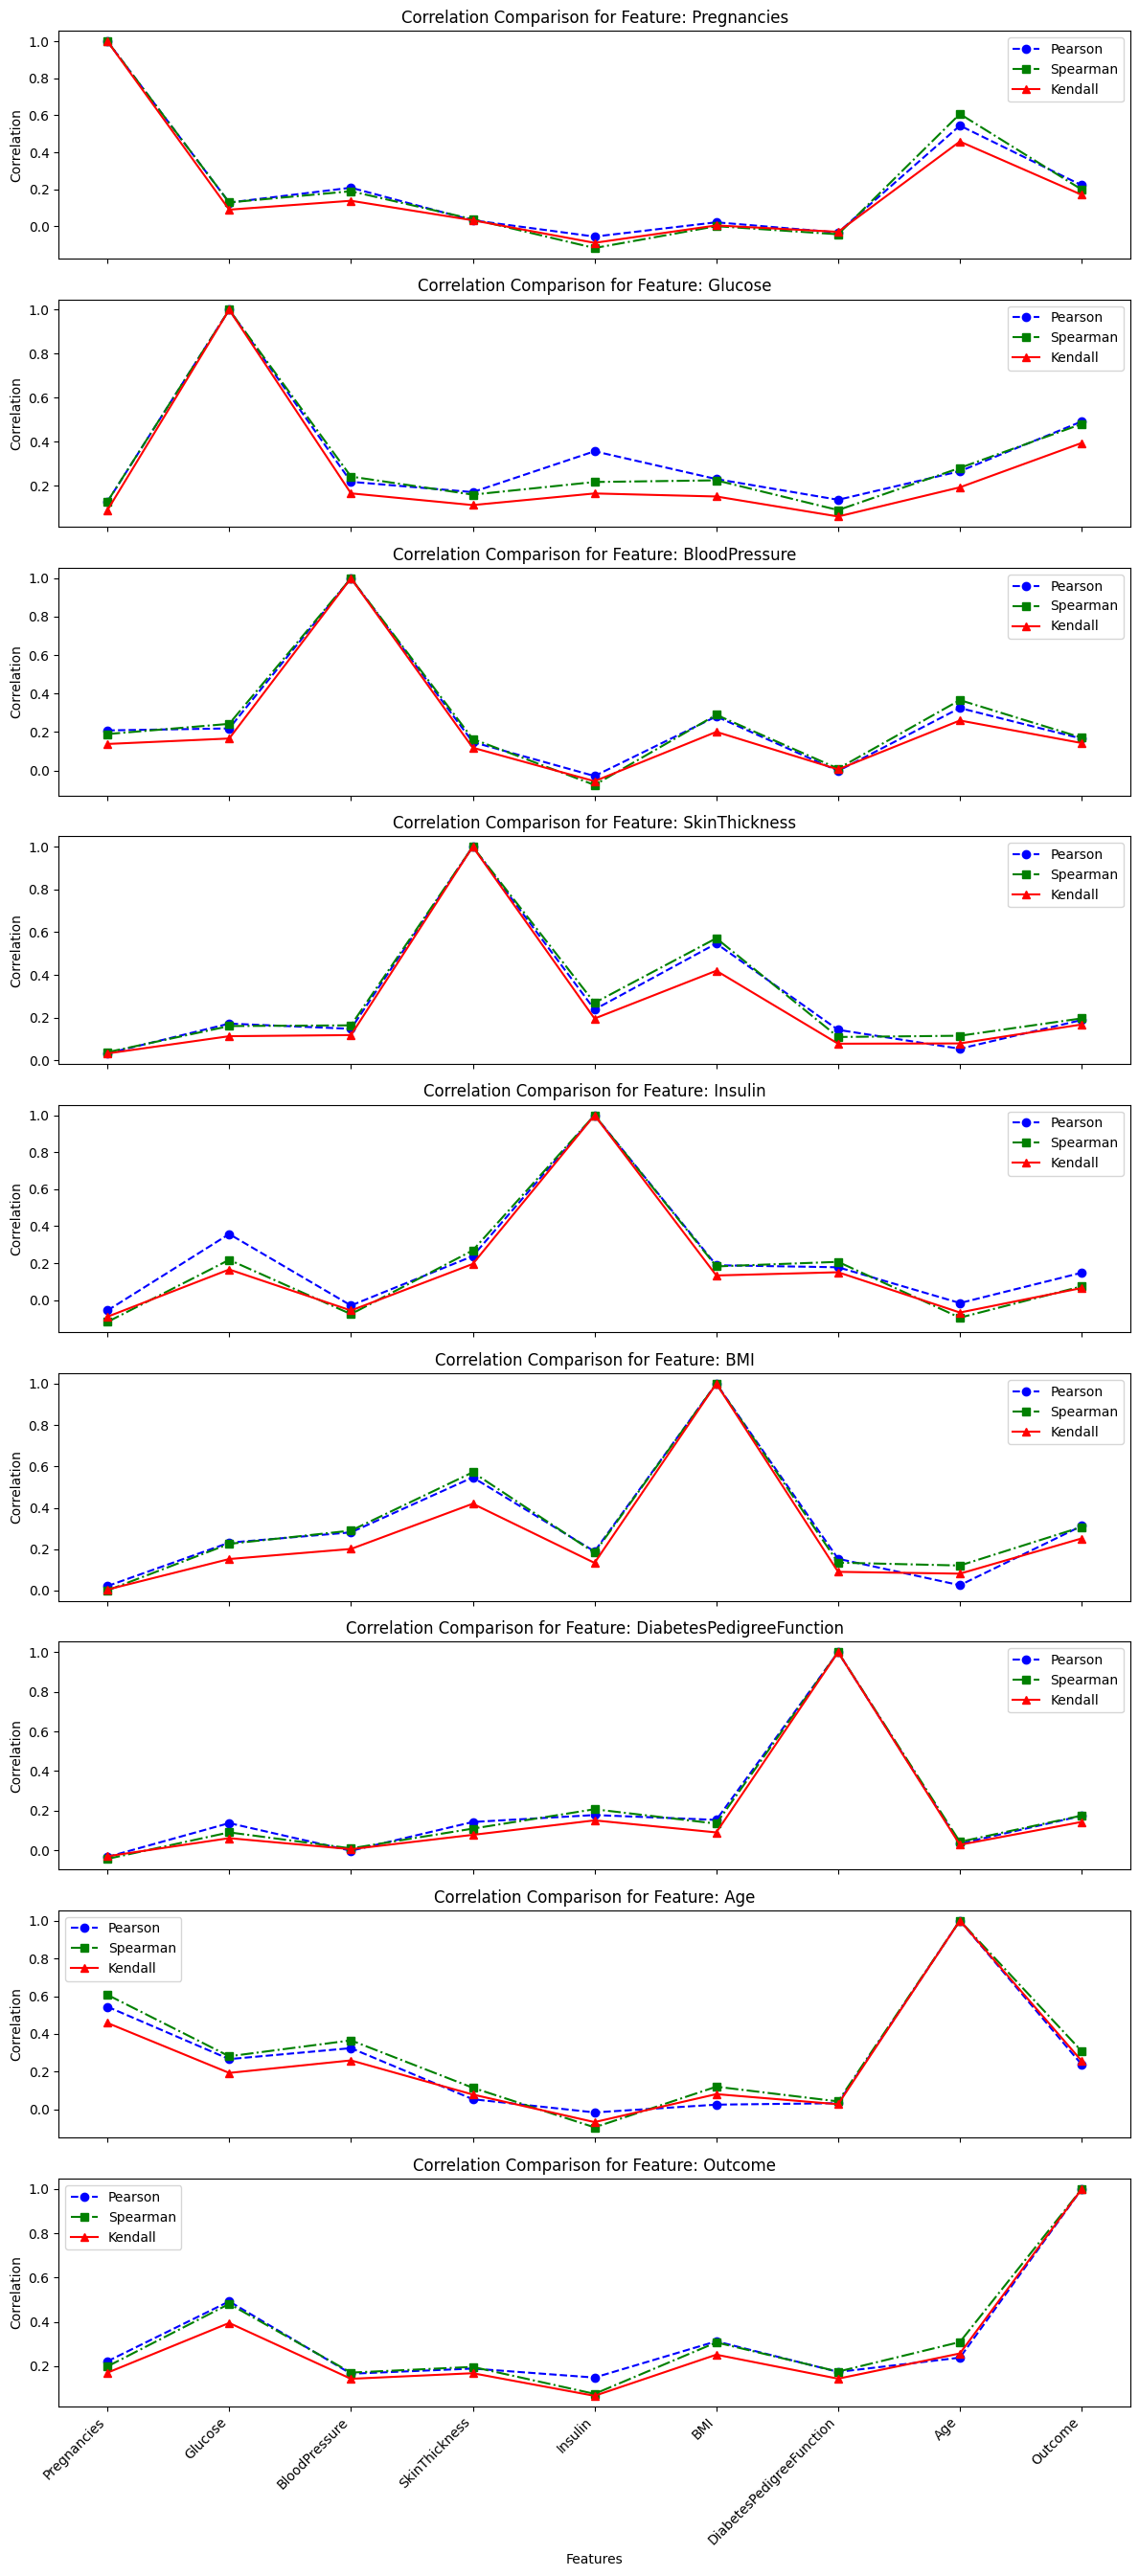

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assume 'df' is your DataFrame

# Compute correlation matrices
pearson_corr = df.corr(method='pearson')
spearman_corr = df.corr(method='spearman')
kendall_corr = df.corr(method='kendall')

# Prepare line graph data
features = df.columns
x = np.arange(len(features))

# Create a figure with subplots for each feature
fig, axes = plt.subplots(len(features), 1, figsize=(12, 3 * len(features)), sharex=True)

for i, feature in enumerate(features):
    pearson_values = pearson_corr[feature].values
    spearman_values = spearman_corr[feature].values
    kendall_values = kendall_corr[feature].values

    axes[i].plot(features, pearson_values, marker='o', label='Pearson', linestyle='--', color='blue')
    axes[i].plot(features, spearman_values, marker='s', label='Spearman', linestyle='-.', color='green')
    axes[i].plot(features, kendall_values, marker='^', label='Kendall', linestyle='-', color='red')

    axes[i].set_ylabel('Correlation')
    axes[i].set_title(f'Correlation Comparison for Feature: {feature}')
    axes[i].legend()

axes[-1].set_xlabel('Features')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


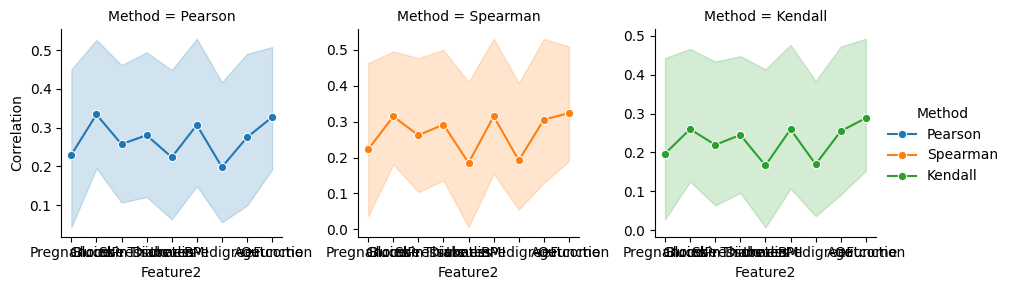

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Melt the correlation matrices into long format
def melt_corr(corr, method):
    corr_melted = corr.reset_index().melt(id_vars='index')
    corr_melted.columns = ['Feature1', 'Feature2', 'Correlation']
    corr_melted['Method'] = method
    return corr_melted

pearson_melted = melt_corr(pearson_corr, 'Pearson')
spearman_melted = melt_corr(spearman_corr, 'Spearman')
kendall_melted = melt_corr(kendall_corr, 'Kendall')

# Combine all melted data
all_corrs = pd.concat([pearson_melted, spearman_melted, kendall_melted])

# FacetGrid to show different correlation methods
g = sns.FacetGrid(all_corrs, col="Method", hue="Method", sharex=False, sharey=False)
g.map_dataframe(sns.lineplot, x="Feature2", y="Correlation", marker='o')
g.add_legend()
plt.show()



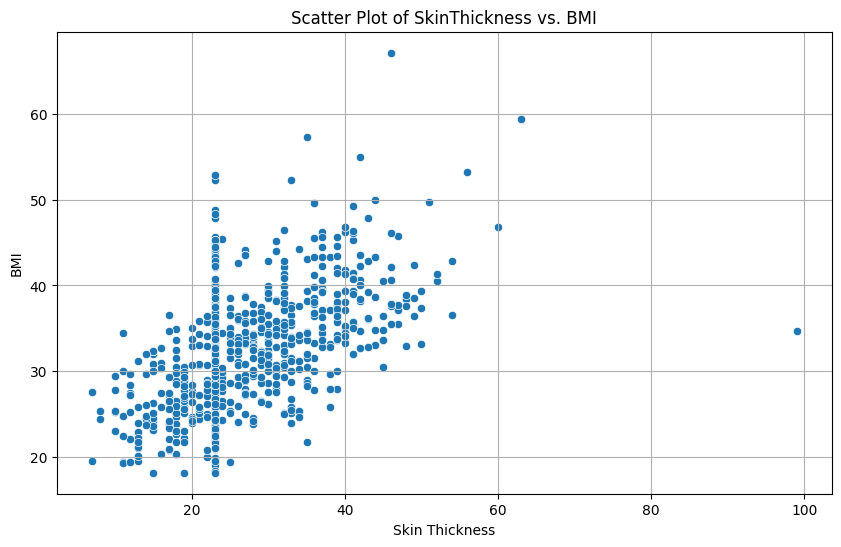

In [ ]:
# Scatter plot for SkinThickness vs. BMI
plt.figure(figsize=(10, 6))
sns.scatterplot(x='SkinThickness', y='BMI', data=df)
plt.title('Scatter Plot of SkinThickness vs. BMI')
plt.xlabel('Skin Thickness')
plt.ylabel('BMI')
plt.grid(True)
plt.show()

Corellation b/w no. of pregnancy and outcome
```
# This is formatted as code
```



In [ ]:
import statsmodels.api as sm

# Define the independent variable (predictor) and dependent variable (outcome)
X = df['Pregnancies']  # Independent variable (number of pregnancies)
y = df['Outcome']      # Dependent variable (diabetes outcome: 0 or 1)

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Fit the logistic regression model
model = sm.Logit(y, X)
result = model.fit()

# Print the summary of the regression
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.622532
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                Outcome   No. Observations:                  768
Model:                          Logit   Df Residuals:                      766
Method:                           MLE   Df Model:                            1
Date:                Mon, 05 Aug 2024   Pseudo R-squ.:                 0.03752
Time:                        10:55:26   Log-Likelihood:                -478.10
converged:                       True   LL-Null:                       -496.74
Covariance Type:            nonrobust   LLR p-value:                 1.026e-09
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -1.1767      0.123     -9.558      0.000      -1.418      -0.935
Pregnancies     0.1372    

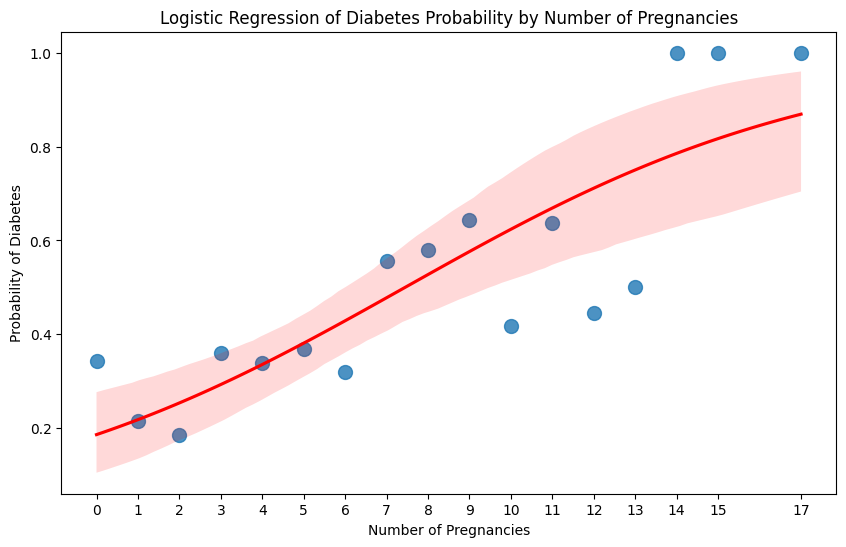

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset

# Group by number of pregnancies and calculate the mean probability of diabetes
pregnancy_group = df.groupby('Pregnancies')['Outcome'].mean().reset_index()

# Plot
plt.figure(figsize=(10, 6))
sns.regplot(x='Pregnancies', y='Outcome', data=pregnancy_group, logistic=True, scatter_kws={'s':100}, line_kws={'color':'red'})
plt.xticks(ticks=pregnancy_group['Pregnancies'].unique())  # Set x-ticks to distinct values of Pregnancies
plt.xlabel('Number of Pregnancies')
plt.ylabel('Probability of Diabetes')
plt.title('Logistic Regression of Diabetes Probability by Number of Pregnancies')
plt.show()



predicting if pregnant during recording based on insulin, glucose levels and bmi and age

feature engineering

In [ ]:
def create_new_bmi(df):
    new_cat = "NEW_BMI_CAT"
    df.loc[(df['BMI'] < 18.5), new_cat] = "underweight"
    df.loc[(df['BMI'] > 18.5) & (df['BMI'] < 25), new_cat] = "normal"
    df.loc[(df['BMI'] > 24) & (df['BMI'] < 30), new_cat] =  "overweight"
    df.loc[(df['BMI'] > 30) & (df['BMI']< 40), new_cat] = "obese"
    df.drop('BMI', axis=1, inplace=True)
    df[new_cat] = df[new_cat].astype('category')

def create_new_glucose(df):
    new_cat = "NEW_GLUCOSE_CAT"
    df.loc[(df['Glucose'] < 70), new_cat] = "low"
    df.loc[(df['Glucose'] > 70) & (df['Glucose'] < 99), new_cat] = "normal"
    df.loc[(df['Glucose'] > 99) & (df['Glucose'] < 126), new_cat] = "high"
    df.loc[(df['Glucose'] > 126) & (df['Glucose'] < 200), new_cat] = "very_high"
    df[new_cat] = df[new_cat].astype('category')


def create_new_skinthickness(df):
    new_cat = "NEW_SKIN_THICKNESS"
    df.loc[df['SkinThickness'] < 30, new_cat] = "normal"
    df.loc[df['SkinThickness'] >= 70, new_cat] = "highfat"
    df[new_cat] = df[new_cat].astype('category')

def create_new_pregnancies(df):
    new_cat = "NEW_PREGNANCIES"
    df.loc[df['Pregnancies'] == 0, new_cat] = "no_pregnancies"
    df.loc[(df['Pregnancies'] > 0) & df['Pregnancies'] <= 4, new_cat] = "std_pregnancies"
    df.loc[(df['Pregnancies'] > 4), new_cat] = "over_pregnancies"
    df[new_cat] = df[new_cat].astype('category')

def create_circulation_level(df):
    new_cat = "NEW_CIRCULATION_LEVEL"
    df.loc[(df['SkinThickness'] < 30) & (df['BloodPressure'] < 80), new_cat] = "normal"
    df.loc[(df['SkinThickness'] > 30) & (df['BloodPressure']>= 80), new_cat] = "high_risk"
    df.loc[((df['SkinThickness']< 30) & (df['BloodPressure'] >=80)) | ((df['SkinThickness']> 30) & (df['BloodPressure'] <80)), new_cat] = "medium_risk"
    df[new_cat] = df[new_cat].astype('category')
    df.drop('SkinThickness', axis=1, inplace=True)

def create_other_features(df):
    df['PRE_AGE_CAT'] = df['Age'] * df['Pregnancies']
    df['INSULIN_GLUCOSE_CAT'] = df['Insulin'] * df['Glucose']
    df.drop('Pregnancies', axis=1, inplace=True)
    df.drop('Glucose', axis=1, inplace=True)

create_new_bmi(df)
create_new_glucose(df)
create_new_pregnancies(df)
create_new_skinthickness(df)
create_circulation_level(df)
create_other_features(df)
df

,BloodPressure,Insulin,DiabetesPedigreeFunction,Age,Outcome,Pregnancy_Status,Diabetes_Status,NEW_BMI_CAT,NEW_GLUCOSE_CAT,NEW_PREGNANCIES,NEW_SKIN_THICKNESS,NEW_CIRCULATION_LEVEL,PRE_AGE_CAT,INSULIN_GLUCOSE_CAT
0,72,30.5,0.627,50,1,Pregnant,Diabetic,obese,very_high,over_pregnancies,nan,medium_risk,300,4514.0
1,66,30.5,0.351,31,0,Pregnant,Non-Diabetic,overweight,normal,std_pregnancies,normal,normal,31,2592.5
2,64,30.5,0.672,32,1,Pregnant,Diabetic,normal,very_high,over_pregnancies,normal,normal,256,5581.5
3,66,94.0,0.167,21,0,Pregnant,Non-Diabetic,overweight,normal,std_pregnancies,normal,normal,21,8366.0
4,40,168.0,2.288,33,1,Not Pregnant,Diabetic,nan,very_high,std_pregnancies,nan,medium_risk,0,23016.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,76,180.0,0.171,63,0,Pregnant,Non-Diabetic,obese,high,over_pregnancies,nan,medium_risk,630,18180.0
764,70,30.5,0.340,27,0,Pregnant,Non-Diabetic,obese,high,std_pregnancies,normal,normal,54,3721.0
765,72,112.0,0.245,30,0,Pregnant,Non-Diabetic,overweight,high,over_pregnancies,normal,normal,150,13552.0
766,60,30.5,0.349,47,1,Pregnant,Diabetic,obese,nan,std_pregnancies,normal,normal,47,3843.0


label encoding

In [ ]:
df['NEW_CIRCULATION_LEVEL'].dtype.name == 'category'

True

In [ ]:
len(df['NEW_CIRCULATION_LEVEL'].unique())


4

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sbs

In [ ]:
label_encoder = preprocessing.LabelEncoder()
df['Outcome'] = label_encoder.fit_transform(df['Outcome'])

one hot encoding

In [ ]:
categ_cols = [col for col in df.columns if df[col].dtype.name == 'category']
print(categ_cols)

['NEW_BMI_CAT', 'NEW_GLUCOSE_CAT', 'NEW_PREGNANCIES', 'NEW_SKIN_THICKNESS', 'NEW_CIRCULATION_LEVEL']


In [ ]:
def one_hot_encoder(df, columns):
    df_dummy = df.copy()
    df_dummy = pd.get_dummies(df, columns=columns, drop_first=True)
    return df_dummy

result = one_hot_encoder(df, categ_cols)
result

,BloodPressure,Insulin,DiabetesPedigreeFunction,Age,Outcome,Pregnancy_Status,Diabetes_Status,PRE_AGE_CAT,INSULIN_GLUCOSE_CAT,NEW_BMI_CAT_normal,...,NEW_GLUCOSE_CAT_low,NEW_GLUCOSE_CAT_nan,NEW_GLUCOSE_CAT_normal,NEW_GLUCOSE_CAT_very_high,NEW_PREGNANCIES_std_pregnancies,NEW_SKIN_THICKNESS_nan,NEW_SKIN_THICKNESS_normal,NEW_CIRCULATION_LEVEL_medium_risk,NEW_CIRCULATION_LEVEL_nan,NEW_CIRCULATION_LEVEL_normal
0,72,30.5,0.627,50,1,Pregnant,Diabetic,300,4514.0,False,...,False,False,False,True,False,True,False,True,False,False
1,66,30.5,0.351,31,0,Pregnant,Non-Diabetic,31,2592.5,False,...,False,False,True,False,True,False,True,False,False,True
2,64,30.5,0.672,32,1,Pregnant,Diabetic,256,5581.5,True,...,False,False,False,True,False,False,True,False,False,True
3,66,94.0,0.167,21,0,Pregnant,Non-Diabetic,21,8366.0,False,...,False,False,True,False,True,False,True,False,False,True
4,40,168.0,2.288,33,1,Not Pregnant,Diabetic,0,23016.0,False,...,False,False,False,True,True,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,76,180.0,0.171,63,0,Pregnant,Non-Diabetic,630,18180.0,False,...,False,False,False,False,False,True,False,True,False,False
764,70,30.5,0.340,27,0,Pregnant,Non-Diabetic,54,3721.0,False,...,False,False,False,False,True,False,True,False,False,True
765,72,112.0,0.245,30,0,Pregnant,Non-Diabetic,150,13552.0,False,...,False,False,False,False,False,False,True,False,False,True
766,60,30.5,0.349,47,1,Pregnant,Diabetic,47,3843.0,False,...,False,True,False,False,True,False,True,False,False,True


model training

In [ ]:
def one_hot_encoder(df, columns):
    df_dummy = df.copy()
    df_dummy = pd.get_dummies(df, columns=columns, drop_first=True)
    return df_dummy

result = one_hot_encoder(df, categ_cols)
result

,BloodPressure,Insulin,DiabetesPedigreeFunction,Age,Outcome,Pregnancy_Status,Diabetes_Status,PRE_AGE_CAT,INSULIN_GLUCOSE_CAT,NEW_BMI_CAT_normal,...,NEW_GLUCOSE_CAT_low,NEW_GLUCOSE_CAT_nan,NEW_GLUCOSE_CAT_normal,NEW_GLUCOSE_CAT_very_high,NEW_PREGNANCIES_std_pregnancies,NEW_SKIN_THICKNESS_nan,NEW_SKIN_THICKNESS_normal,NEW_CIRCULATION_LEVEL_medium_risk,NEW_CIRCULATION_LEVEL_nan,NEW_CIRCULATION_LEVEL_normal
0,72,30.5,0.627,50,1,Pregnant,Diabetic,300,4514.0,False,...,False,False,False,True,False,True,False,True,False,False
1,66,30.5,0.351,31,0,Pregnant,Non-Diabetic,31,2592.5,False,...,False,False,True,False,True,False,True,False,False,True
2,64,30.5,0.672,32,1,Pregnant,Diabetic,256,5581.5,True,...,False,False,False,True,False,False,True,False,False,True
3,66,94.0,0.167,21,0,Pregnant,Non-Diabetic,21,8366.0,False,...,False,False,True,False,True,False,True,False,False,True
4,40,168.0,2.288,33,1,Not Pregnant,Diabetic,0,23016.0,False,...,False,False,False,True,True,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,76,180.0,0.171,63,0,Pregnant,Non-Diabetic,630,18180.0,False,...,False,False,False,False,False,True,False,True,False,False
764,70,30.5,0.340,27,0,Pregnant,Non-Diabetic,54,3721.0,False,...,False,False,False,False,True,False,True,False,False,True
765,72,112.0,0.245,30,0,Pregnant,Non-Diabetic,150,13552.0,False,...,False,False,False,False,False,False,True,False,False,True
766,60,30.5,0.349,47,1,Pregnant,Diabetic,47,3843.0,False,...,False,True,False,False,True,False,True,False,False,True


In [ ]:
from sklearn.model_selection import train_test_split

X = result.drop('Outcome', axis=1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error

rmse  = lambda labels, predictions: np.sqrt(mean_squared_error(labels, predictions))

lg_model = LogisticRegression(max_iter=1000,C=0.01).fit(X_train, y_train)
lg_predictions = lg_model.predict(X_test)
rmse(y_test, lg_predictions)

ValueError: could not convert string to float: 'Pregnant'